In [1]:
import torch
import torch.nn as nn


import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader

from common import *

In [2]:
import logging, sys
logging.basicConfig(stream=sys.stderr, level=logging.INFO)
logging.debug('A debug message!')


In [3]:
torch.autograd.set_detect_anomaly(True)
device = "cpu"

In [4]:
# read the data from the "GeneratorInput.txt" file
def read_data(file_name):
    with open(file_name, 'r') as file:
        data = file.readlines()
    return data

raw_data = read_data("GeneratorInput.txt")

datasets = []
y_idx = 0
dataset = None
for line in raw_data:
    if len(line) <= 1:
        datasets.append(dataset.copy())
        y_idx = 0
        dataset = []
        continue
    y_idx += 1
    if dataset is None:
        dataset = []
    for x_idx,char in enumerate(line):
        if char == '0' or char == '1':
            dataset.append((y_idx,x_idx+1, int(char)))
    

In [5]:
data = datasets[13]
X = torch.tensor([list(sublist[:2]) for sublist in data], dtype=torch.float32)
y = torch.tensor([item for sublist in data for item in sublist[2:]], dtype=torch.float32).unsqueeze(1)


#scale the data to be between 0 and 1
X = X / X.max()
X

tensor([[0.1000, 0.2000],
        [0.1000, 0.3000],
        [0.1000, 0.5000],
        [0.1000, 0.8000],
        [0.1000, 0.9000],
        [0.2000, 0.1000],
        [0.2000, 0.4000],
        [0.2000, 0.7000],
        [0.3000, 0.3000],
        [0.3000, 0.4000],
        [0.3000, 0.5000],
        [0.3000, 0.6000],
        [0.3000, 0.8000],
        [0.3000, 1.0000],
        [0.4000, 0.1000],
        [0.4000, 0.5000],
        [0.5000, 0.1000],
        [0.5000, 0.3000],
        [0.5000, 1.0000],
        [0.6000, 0.4000],
        [0.6000, 0.6000],
        [0.6000, 0.8000],
        [0.6000, 1.0000],
        [0.7000, 0.1000],
        [0.7000, 0.2000],
        [0.7000, 0.3000],
        [0.7000, 0.4000],
        [0.7000, 0.5000],
        [0.7000, 0.7000],
        [0.7000, 0.9000],
        [0.8000, 0.1000],
        [0.8000, 0.4000],
        [0.8000, 0.5000],
        [0.8000, 0.8000],
        [0.8000, 0.9000],
        [0.8000, 1.0000],
        [0.9000, 0.2000],
        [0.9000, 0.3000],
        [0.9

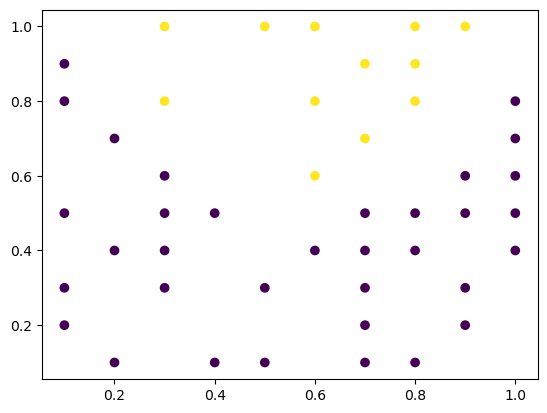

In [6]:
# plot X and y
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


# Network1


# Network 2

In [7]:
# Create a PyTorch dataset and data loader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


model = Network4()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.005)
total_epochs = 0
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Epoch [20/3000] total 5320, Loss: 0.0709, Accuracy: 95.65
Epoch [40/3000] total 5340, Loss: 0.0094, Accuracy: 95.65
Epoch [60/3000] total 5360, Loss: 0.0551, Accuracy: 95.65
Epoch [80/3000] total 5380, Loss: 0.2063, Accuracy: 95.65
Epoch [100/3000] total 5400, Loss: 0.0809, Accuracy: 95.65
Epoch [120/3000] total 5420, Loss: 0.0047, Accuracy: 95.65
Epoch [140/3000] total 5440, Loss: 0.0846, Accuracy: 95.65
Epoch [160/3000] total 5460, Loss: 0.0181, Accuracy: 95.65
Epoch [180/3000] total 5480, Loss: 0.0195, Accuracy: 95.65
Epoch [200/3000] total 5500, Loss: 0.0532, Accuracy: 95.65
Epoch [220/3000] total 5520, Loss: 0.1525, Accuracy: 95.65
Epoch [240/3000] total 5540, Loss: 0.0083, Accuracy: 95.65
Epoch [260/3000] total 5560, Loss: 0.0486, Accuracy: 95.65
Epoch [280/3000] total 5580, Loss: 0.0299, Accuracy: 95.65
Epoch [300/3000] total 5600, Loss: 0.0172, Accuracy: 95.65
Epoch [320/3000] total 5620, Loss: 0.0058, Accuracy: 95.65
Epoch [340/3000] total 5640, Loss: 0.0016, Accuracy: 95.65
E

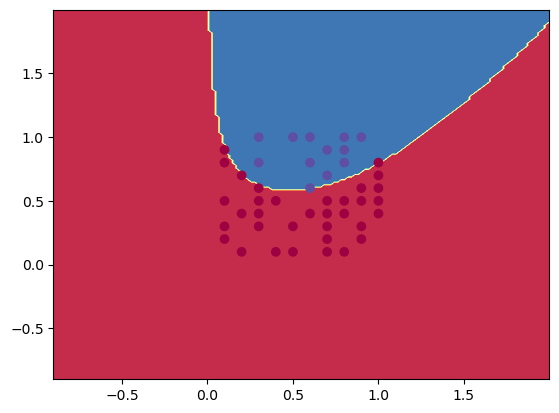

In [15]:
# Train the model
num_epochs = 3000
for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        # print(f"y_pred is {y_pred} and y_batch is {y_batch}")
        y_pred = model(X_batch)
        
        # replace y_pred nan with 0
        # y_pred = torch.nan_to_num(y_pred)

        # logging.debug(f"y_pred is {y_pred} and y_batch is {y_batch}")
        
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()

        loss.backward()
        # clip the gradients
        # for param in model.parameters():
        #     param.grad.data.clamp_(-100, 100)

        optimizer.step()

        # for name, param in model.named_parameters(): 
        #     logging.debug(f"{name} has gradient {param.grad}")

    # calculate accuracy for all training data
    y_pred = model(X)
    y_pred = torch.round(y_pred)
    correct = (y_pred == y).sum().item()
    accuracy = correct / len(y)
    total_epochs += 1
    

    if accuracy > 0.99:
        print("HOORAY")
        break
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] total {total_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}")
    

plot_decision_boundary(model, X, y)

In [16]:
# print all parameters of the model
for name, param in model.named_parameters():
    print(f"{name} has shape {param.shape} and value {param}")

# print model gradients
for name, param in model.named_parameters(): 
    print(f"{name} has gradient {param.grad}")
    

polynomial.bias_before has shape torch.Size([2]) and value Parameter containing:
tensor([0.7519, 0.0108], requires_grad=True)
polynomial.bias has shape torch.Size([1]) and value Parameter containing:
tensor([-2.0349], requires_grad=True)
polynomial.synapses.0.0.power has shape torch.Size([1]) and value Parameter containing:
tensor([-2.7119], requires_grad=True)
polynomial.synapses.0.0.term_weights has shape torch.Size([3]) and value Parameter containing:
tensor([-2.2966,  0.2411, -0.0082], requires_grad=True)
polynomial.synapses.0.1.power has shape torch.Size([1]) and value Parameter containing:
tensor([2.1155], requires_grad=True)
polynomial.synapses.0.1.term_weights has shape torch.Size([3]) and value Parameter containing:
tensor([ 0.0273, -2.2497, -1.1504], requires_grad=True)
product.bias_before has shape torch.Size([2]) and value Parameter containing:
tensor([0.9638, 0.5058], requires_grad=True)
product.bias has shape torch.Size([1]) and value Parameter containing:
tensor([-2.0455